

<hr style="margin-bottom: 40px;">

# Principal - Backtesting

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## (A) (B) Simplified

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

df = pd.read_excel("Principal1.xlsx", parse_dates=True, index_col="date")
df.apply(pd.to_numeric, errors='ignore')
df = df.rename(columns=lambda x: x.strip())
df = df.dropna(axis="index",how="all") #drop NaN values. The earliest data starts from 2001-11-20.



In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.expected_returns import mean_historical_return

In [ ]:
describe = df.describe()
describe = pd.DataFrame(describe)
describe = describe.T
describe

In [ ]:
# get a list of all the column names 
indexNamesArr = describe.index.values
# convert ndarray to list
listOfRowIndexLabels = list(indexNamesArr)

coord = [(0.038802, 1.598254),( 0.023617, 0.745137),( 0.025753, 0.802417),( 0.045350, 2.066649),( 0.106415, 0.574546),( 0.053244, 0.432762),( 0.039204, 1.853161),( 0.059571, 0.444722),( 0.024976, 2.706996),( 0.012862, 0.312357),( 0.039587, 2.285998),( 0.001826, 0.044556),( 0.027979, 1.050875),( 0.032775, 1.438767),( 0.040590, 2.009521),( 0.042759, 2.400255)]
labels = listOfRowIndexLabels

def plot_with_labels(coord, labels):
    assert len(coord) == len(labels), 'coord len is not equal to labels len'
    plt.figure(figsize=(10,30))
    plt.xlabel('Mean historic return')
    plt.ylabel('volatility')
    plt.title("Performance of Principal Funds")
    plt
    for i, label in enumerate(labels): #get (0, label)
        x, y = coord[i] #2 dim
        plt.scatter(x, y,)
                #
        plt.annotate(label,
                xy=(x, y), #show point 
                xytext=(5, 2), #show annotate
                textcoords='offset points',
                ha='right',
                va='bottom')
    plt.show()
    
plot_with_labels(coord, labels)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## (C) - Backtesting and Optimization

### Split training set and test set

1. Split data in train and test set given a Date (i.e. test set is what happens after 31 July 2020 not included).

2. Further split train set into train set and validation set (i.e. what happens before 31 July 2020 included) in 6 consecutive time folds.

Then, in order not lo lose the time information, perform the following steps:
 
one = Train on fold 10,11,12,13 (2010-08-01 to 2014-07-31) –>  Test on fold 14 (2014-08-01 to 2015-07-31)

two = Train on fold 11,12,13,14 –>  Test on fold 15 

three = Train on fold 12,13,14,15 –>  Test on fold 16

four = Train on fold 13,14,15,16 –>  Test on fold 17

five = Train on fold 14,15,16,17 –>  Test on fold 18

six = Train on fold 15,16,17,18 –>  Test on fold 19 (2019-08-01 to 2020-07-31)

Compute the average of the accuracies of the 6 test folds.

In [40]:
S = CovarianceShrinkage(df).ledoit_wolf()
mu = mean_historical_return(df)
from datetime import date
one = df[(df.index > pd.Timestamp(date(2017,8,1))) & (df.index < pd.Timestamp(date(2018,8,1)))]
two = df[(df.index > pd.Timestamp(date(2018,8,1))) & (df.index < pd.Timestamp(date(202,8,1)))]
three = df[(df.index > pd.Timestamp(date(2019,8,1))) & (df.index < pd.Timestamp(date(2020,8,1)))]



In [41]:
#Calculating risk (covariance matrix) for different train periods.
S1 = CovarianceShrinkage(one).ledoit_wolf()
S2 = CovarianceShrinkage(two).ledoit_wolf()
S3 = CovarianceShrinkage(three).ledoit_wolf()

'''plot them for the presentation.
plotting.plot_covariance(S1, plot_correlation=True)
plotting.plot_covariance(S2, plot_correlation=True)
plotting.plot_covariance(S3, plot_correlation=True)
plotting.plot_covariance(S4, plot_correlation=True)
plotting.plot_covariance(S5, plot_correlation=True)
plotting.plot_covariance(S6, plot_correlation=True)
'''

#Calculating the expected returns for different train periods.
mu1 = mean_historical_return(one)
mu2 = mean_historical_return(two)
mu3 = mean_historical_return(three)

'''plot and show them for the presentation.
mu1
mu1.plot.barh(figsize=(10,6))
(same for others)
'''

'plot and show them for the presentation.\nmu1\nmu1.plot.barh(figsize=(10,6))\n(same for others)\n'

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Function 1a - Portfolio Optimization for maximal Sharpe ratio
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



## 1st five-year Backtesting (for Function 1a)
### Run the function - what's the weighting for this period?

OrderedDict([('PRSSCOA HK Equity', 1.0)])
Performance of function 1a portfolio in train period:


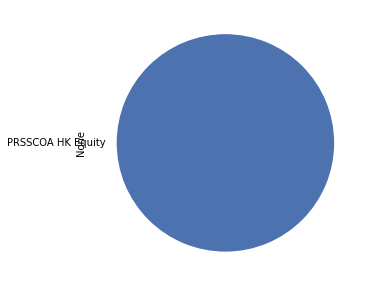

In [42]:
ef = EfficientFrontier(mu1, S1)

weight1a = ef.max_sharpe() #raw weights
cleanweight1a = ef.clean_weights() #cleaned weights
print(cleanweight1a)
print("Performance of function 1a portfolio in train period:")
pd.Series(cleanweight1a).plot.pie(figsize=(5,5))

### Comparison - Performance of Portfolio during the Train period.

Expected annual return: 5.3%
Annual volatility: 10.3%
Sharpe Ratio: 0.33


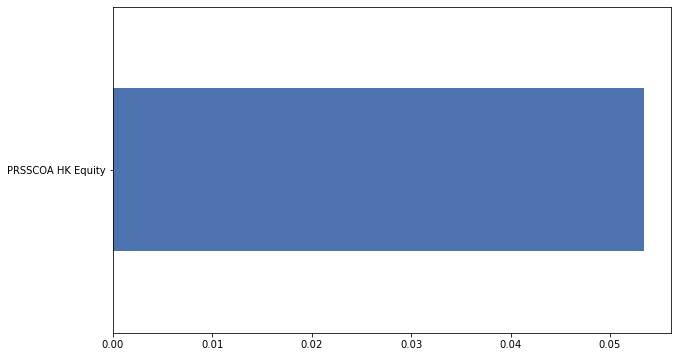

In [43]:
ret,vol,sharpe = ef.portfolio_performance(verbose=True)

mu1.plot.barh(figsize=(10,6))    #return of each funds from 2010 to 2014.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## 2nd five-year Backtesting  (for Function 1a)

### Run the function - what's the weighting for this period?

OrderedDict([('PRSSCOA HK Equity', 1.0)])
Performance of function 1a portfolio in train period:


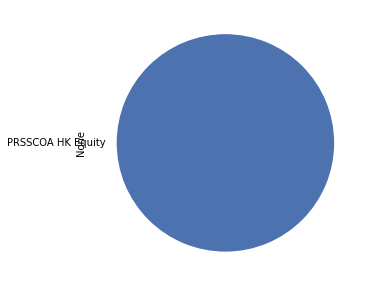

In [44]:
ef = EfficientFrontier(mu2, S2)

weight1a = ef.max_sharpe() #raw weights
cleanweight1a = ef.clean_weights() #cleaned weights
print(cleanweight1a)
print("Performance of function 1a portfolio in train period:")
pd.Series(cleanweight1a).plot.pie(figsize=(5,5))

### Comparison - Performance of Portfolio during the Train period.

Expected annual return: 5.1%
Annual volatility: 12.0%
Sharpe Ratio: 0.26


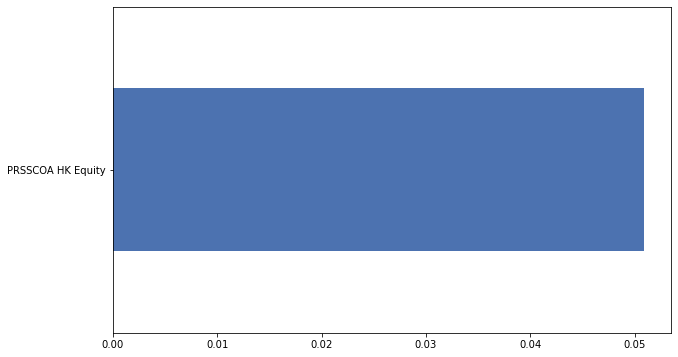

In [45]:
ret,vol,sharpe = ef.portfolio_performance(verbose=True)

mu2.plot.barh(figsize=(10,6))    #return of each funds from 2010 to 2014.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## 3rd five-year Backtesting  (for Function 1a)

### Run the function - what's the weighting for this period?

OrderedDict([('PRSSCOA HK Equity', 1.0)])
Performance of function 1a portfolio in train period:


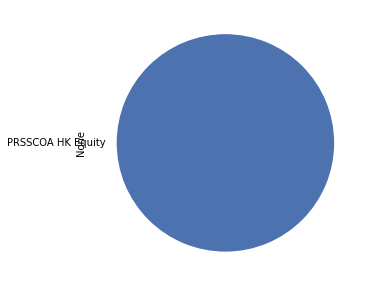

In [46]:
ef = EfficientFrontier(mu3, S3)

weight1a = ef.max_sharpe() #raw weights
cleanweight1a = ef.clean_weights() #cleaned weights
print(cleanweight1a)
print("Performance of function 1a portfolio in train period:")
pd.Series(cleanweight1a).plot.pie(figsize=(5,5))

### Comparison - Performance of Portfolio during the Train period.

Expected annual return: 7.4%
Annual volatility: 15.4%
Sharpe Ratio: 0.35


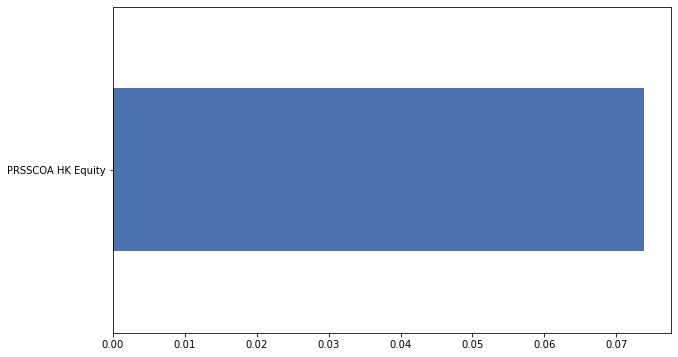

In [47]:
ret,vol,sharpe = ef.portfolio_performance(verbose=True)

mu3.plot.barh(figsize=(10,6))    #return of each funds from 2010 to 2014.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)